# IC: u(x,0) = x
# BC : u(0,t) = t & u(1,t) = 1+t

In [73]:
###################
# Independent variable functions
#      u(x,t_0) = f(x)
#      u(x_0,t) = g1(t)
#      u(x_n,t) = g2(t)
def f(x):
    """Inputs position array x and outputs f(x)."""
    import numpy as np
    return x

def g1(t):
    """Inputs time array t and outputs g1(t)."""
    import numpy as np
    return t

def g2(t):
    """Inputs time array t and outputs g2(t)."""
    import numpy as np
    return 1 + t




###################
# Matrix generation functions
def initial_u_matrix(x_val,t_val):
    """
    Creates a very specific matrix that includes all our initial and boundary values such that our
    unknown values are 0.
    
    This foundation will be:
    [u(x_0,t_0) ; u(x_0,t_1) ; u(x_0,t_2) ; ... ; u(x_0,t_n)]
    [u(x_1,t_0) ;     0      ;     0      ; ... ;     0     ]
    [u(x_2,t_0) ;     0      ;     0      ; ... ;     0     ]
    [    ...    ;     0      ;     0      ; ... ;     0     ]
    [u(x_n,t_0) ; u(x_n,t_1) ; u(x_n,t_2) ; ... ; u(x_n,t_n)]
    =
    [  0  ;  t_1  ;  t_2  ; ... ;  t_n  ]
    [ x_1 ;   0   ;   0   ; ... ;   0   ]
    [ x_2 ;   0   ;   0   ; ... ;   0   ]
    [ ... ;   0   ;   0   ; ... ;   0   ]
    [  1  ; 1+t_1 ; 1+t_2 ; ... ; 1+t_n ]
    """
    import numpy as np
    
    # Create our zero matrix and make the first row t_val
    matrix = np.zeros((x_val.size,t_val.size))
    matrix[0] = g1(t_val)
    
    # Make the first column x_val and last row 1+t_val
    matrix[:,0] = f(x_val)
    matrix[-1] = g2(t_val)
    
    return matrix

def deriv_matrix(dimension):
    """Inputs a dimension to generate an nxn matrix with -1,1 in each row and -1 in the diagonal."""
    import numpy as np
    
    # Generate the 0 matrix as our starting point, make it 1 rows/columns shorter, and make its diagonal 1's
    matrix = np.zeros((dimension-1,dimension-1), dtype = "int8")
    np.fill_diagonal(matrix, int(1))
    
    
    
    
    # Add a row of 0's to the bottom and column of 0's to the left
    row = np.zeros((dimension-1,1), dtype = "int8")
    matrix = np.hstack((row, matrix))

    column = np.zeros((1,dimension), dtype = "int8")
    matrix = np.vstack((matrix, column))
    
    # Replace the new diagonals with -1
    np.fill_diagonal(matrix,int(-1))
    
    return matrix




###################
# Graphing function
def graph_3d(x,t,u):
    """Inputs position matrix (x), time matrix (t), and
    resulting displacement matrix (u) to generate a 3D surface graph."""
    
    # Import libraries
    from mpl_toolkits import mplot3d
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Create 3D axis and plot points
    fig = plt.figure(figsize=(8,6))
    ax = plt.axes(projection='3d')
    

    
    
    ax.plot_surface(x, t, u, cmap = 'viridis')
    
    # Label the axes
    ax.set_xlabel('Position')
    ax.set_ylabel('Time')
    ax.set_zlabel('Displacement')
    
    # Rotate and display the plot
    ax.view_init(40,250)
    ax.set_box_aspect(None, zoom=1)
    plt.show()

In [74]:
def ux_to_ut(x_int,t_int,t_max):
    """
    This solves the PDE u_x=u_t with the specified initial and boundary conditions.
    The minimum values of x & t are both 0, and they might have pre-determined maximum values.
    
    In this case, 0<x<1, though the t-max is up to you and the number of intervals for both is also up to you.
    """
    # Import Modules
    import numpy as np
    from time import time
    begin = time()
    
    
    
    
    # Make our arrays of x and t inputs and the x interval width constant
    x_val = np.linspace(0, 1, x_int+1)
    t_val = np.linspace(0, t_max, t_int+1)
    x_width = 1 / x_int

    

    
    # Make our input arrays into repeated matrices
    T_val, X_val = np.meshgrid(t_val,x_val)
    
    # Create the foundation for our output matrix
    U_val = initial_u_matrix(x_val,t_val)
    
    # Create our derivative matrix for V(t)
    D1_matrix = deriv_matrix(x_val.size-2)
    
    # Create an array that's necessary for later math to work out
    temp_array = np.zeros(x_val.size-2)
    

    # Go through every column in our U-matrix that hasn't pre-emptively been filled in
    # This would be the 2nd column all the way to the last one.
    for column in range(1, t_int+1):
            
        # The zeros in each column go through ALL x-values from x_1 to x_{n-1}
        # Each column is one SPECIFIC t-value though
        temp_t = t_val[column]
            
        # Alter our temp array based on the current t-value
        temp_array[-2] = temp_t ** 3 + 3 * temp_t ** 2
        temp_array[-1] = (3 * temp_t ** 2 + 6 * temp_t) * x_val[-2] - temp_t ** 3 - 3 * temp_t ** 2
            
        # Make an array that will replace the 0's in the current column
        temp_u = np.matmul( np.identity(x_val.size-2) + ( temp_t / x_width ) * D1_matrix , f(x_val[1:-1]) ) + ( 1 / (6 * x_width * x_width) ) * temp_array
        U_val[:,column][1:-1] = temp_u
    
        
    
    
    #print(X_val)
    #print(T_val)
    #print(U_val)
    # Display our approximated graph
    print("Approximated Graph")
    graph_3d(X_val[:-3], T_val[:-3], U_val[:-3])
    
    # Display the actual graph
    print("Actual Graph")
    graph_3d(X_val[:-3], T_val[:-3], X_val[:-3]+T_val[:-3])
    
    print(f"Finished in {round(time()-begin,2)} seconds.")

Approximated Graph


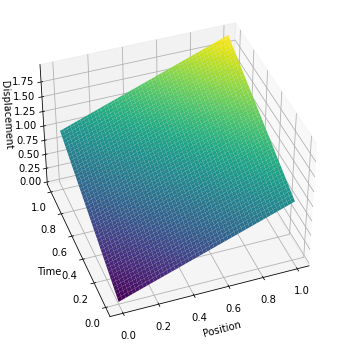

Actual Graph


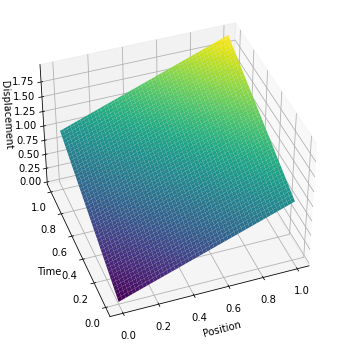

Finished in 3.13 seconds.


In [76]:
ux_to_ut(1000,1000,1)